# 多項分類器によるMNIST分類

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

### http://yann.lecun.com/exdb/mnist/ からダウンロードした記憶がある

In [3]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)#ここのone_hotはone_hotエンコーディングのこと？？？後で確認

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [4]:
images, labels = mnist.train.next_batch(10)

In [5]:
print(images[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [6]:
print(labels[0]) #ここでone-hotエンコーディングされたラベルがついてることを確認した

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


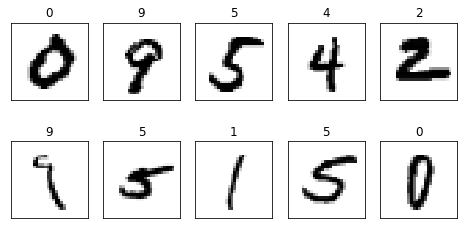

In [11]:
fig = plt.figure(figsize = (8,4))
for c, (image, label) in enumerate(zip(images, labels)):#zipは最も小さいサイズのシーケンスの要素を処理し尽くした時に止まる
    subplot = fig.add_subplot(2, 5, c+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(label)) #labelのマックスのインデックスを返す、つまりonehotエンコーディングなので数字の番号を返す
    subplot.imshow(image.reshape((28,28)), vmin =0, vmax = 1, cmap = plt.cm.gray_r, interpolation="nearest")#一次元なのでrehape()
    #cmap = plt.cm.gray_rは、画像をグレースケールで表示する指定で、vminとvmaxは濃度として含まれる数値の最小値と最大値を与えることで、画像の濃淡を適切に調整している。
    #interpolation="nearest"の指定で画像を滑らかに修正する機能を消している。

In [13]:
np.random.seed(42)

x =tf.placeholder(tf.float32, [None, 784])
w = tf.Variable(tf.zeros([784, 10]))
w0 = tf.Variable(tf.zeros([10]))
f = tf.matmul(x,w)+w0
p = tf.nn.softmax(f)

In [15]:
t = tf.placeholder(tf.float32, [None, 10])
loss = - tf.reduce_sum(t*tf.log(p)) #*はブロードキャスト, 行列のreduce_sumは全要素を足してくれる
train_step = tf.train.AdamOptimizer().minimize(loss)

correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1)) #argmaxの第二引数に0を入れると縦方向に検索し、1を指定すると横方向に検索する
#つまり行の中で一番大きい数を持つindex(列番号)を返す。
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))#True,Falseを0,1にキャストし平均をとることで0~1の正答率を出している

In [16]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [17]:
i = 0 
for _ in range(2000):
    i += 1
    batch_xs, batch_ts = mnist.train.next_batch(100)
    #mnist.train.next_batchはデータをどこまで取り出したかを記憶しており、呼び出すごとに次のデータを取り出す。
    #データを100回取り出すとまた最初に戻る
    sess.run(train_step, feed_dict={x:batch_xs, t:batch_ts})
    if i % 100 == 0:
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict = {x:mnist.test.images, t:mnist.test.labels})
        print('Step: %d, Loss: %f, Accuracy: %f' % (i, loss_val, acc_val))

Step: 100, Loss: 7606.778320, Accuracy: 0.840100
Step: 200, Loss: 5377.465820, Accuracy: 0.878700
Step: 300, Loss: 4518.065430, Accuracy: 0.890900
Step: 400, Loss: 4065.874512, Accuracy: 0.898100
Step: 500, Loss: 3790.415039, Accuracy: 0.902900
Step: 600, Loss: 3578.366699, Accuracy: 0.904700
Step: 700, Loss: 3434.448975, Accuracy: 0.908100
Step: 800, Loss: 3357.012695, Accuracy: 0.910700
Step: 900, Loss: 3248.599854, Accuracy: 0.912000
Step: 1000, Loss: 3169.770508, Accuracy: 0.913800
Step: 1100, Loss: 3121.000977, Accuracy: 0.915500
Step: 1200, Loss: 3095.268311, Accuracy: 0.914900
Step: 1300, Loss: 3032.319092, Accuracy: 0.916600
Step: 1400, Loss: 2991.659424, Accuracy: 0.916700
Step: 1500, Loss: 2974.657959, Accuracy: 0.917900
Step: 1600, Loss: 2935.743164, Accuracy: 0.917800
Step: 1700, Loss: 2901.866211, Accuracy: 0.920900
Step: 1800, Loss: 2887.576172, Accuracy: 0.920500
Step: 1900, Loss: 2870.203369, Accuracy: 0.919800
Step: 2000, Loss: 2854.558350, Accuracy: 0.920200


### 得られた結果を実際の画像で確認する

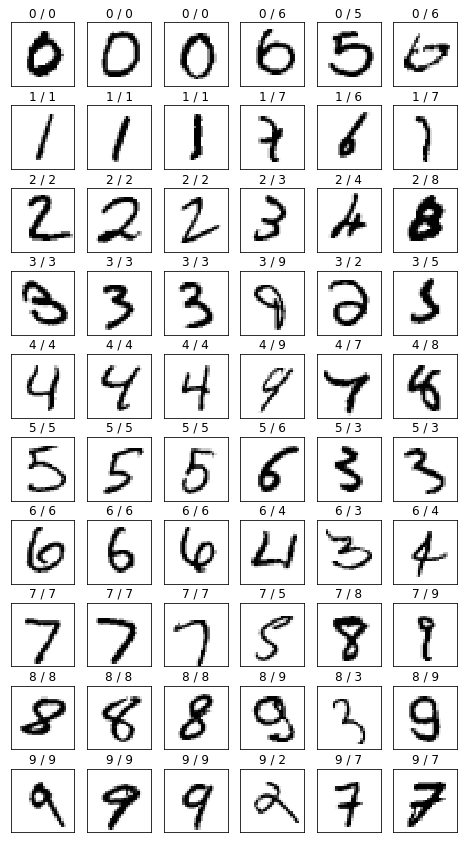

In [23]:
images, labels = mnist.test.images, mnist.test.labels
p_val = sess.run(p, feed_dict = {x:images, t:labels})

fig = plt.figure(figsize = (8, 15))
for i in range(10):
    c = 1
    for (image, label, pred) in zip(images, labels, p_val):
        prediction, actual = np.argmax(pred), np.argmax(label)
        if prediction != i:
            continue
        if(c < 4 and i == actual) or (c >= 4 and i != actual):# 3個actualがあっているものを表示、残り３個actualがあっていないものを表示
            subplot = fig.add_subplot(10, 6, i*6 +c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.set_title('%d / %d' % (prediction, actual))# 予測/正解
            subplot.imshow(image.reshape((28,28)), vmin = 0, vmax = 1, cmap = plt.cm.gray_r, interpolation="nearest")
            c += 1
            if c > 6:
                break